In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from backgroundmnu import Background

in1 = {
            "mnu" : 0.00,
            "mnu_model": "massless"
}

ba_massless = Background(in1)
theta_target = ba_massless.theta_star()

In [2]:
mnu_list = [-.1, -.06, 0.0, 0.06, 0.1]

backgrounds= {}
model_choice = "symmetric"
#theta_target = 0.0104095

def find_omde_for_theta(theta, mnu):

    def theta_s(om_de):
        ba = Background({"omega_de0": om_de, "mnu": mnu, "mnu_model": model_choice})
        return ba.theta_star()

    return fsolve(lambda omde: theta_s(omde) - theta, .31)

for mnu in mnu_list:
    omde = find_omde_for_theta(theta_target, mnu)

    backgrounds[mnu] = Background({"omega_de0": omde, "mnu": mnu,  "mnu_model": model_choice})

 pyhyrec/Background.py:157: overflow encountered in exp (RuntimeWarning)


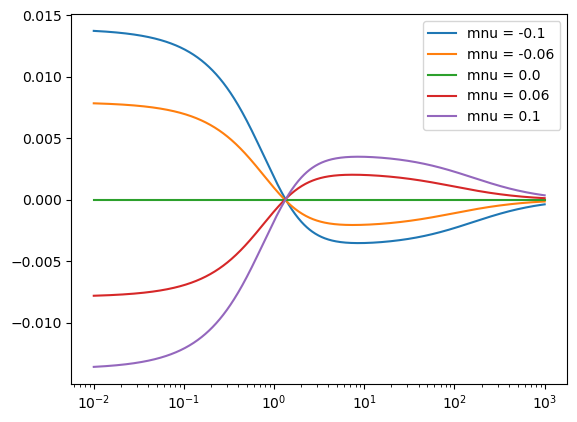

In [3]:
fig,ax = plt.subplots()

redshifts = np.logspace(-2, 3, 1000)

H_massless = ba_massless.Hubble(redshifts)

for mnu in mnu_list:
    H = backgrounds[mnu].Hubble(redshifts)
    ax.plot(redshifts, (H-H_massless)/H_massless, label=f"mnu = {mnu}")

ax.set_xscale("log")
ax.legend()
